In [2]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import poisson

# PART 1 Data Collection and Data Preprocessing.

In [4]:
#1. Import required libraries and import csv file into a dataframe. 

data = pd.read_csv('honeyproduction.csv')
print(data.shape)
data.head()

(626, 8)


,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [10]:
#2. Show the column names of all individual datasets.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        626 non-null    object 
 1   numcol       626 non-null    float64
 2   yieldpercol  626 non-null    int64  
 3   totalprod    626 non-null    float64
 4   stocks       626 non-null    float64
 5   priceperlb   626 non-null    float64
 6   prodvalue    626 non-null    float64
 7   year         626 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 39.3+ KB


In [11]:
#3. Change the datatype of all columns expect price per lb.

data['state'] = data['state'].astype('string')
data['numcol'] = data['numcol'].astype('int64')
data['yieldpercol'] = data['yieldpercol'].astype('int64')
data['totalprod'] = data['totalprod'].astype('int64')
data['stocks'] = data['stocks'].astype('int64')
data['prodvalue'] = data['prodvalue'].astype('int64')
data['year'] = pd.to_datetime(data['year'], format='%Y').dt.year
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        626 non-null    string 
 1   numcol       626 non-null    int64  
 2   yieldpercol  626 non-null    int64  
 3   totalprod    626 non-null    int64  
 4   stocks       626 non-null    int64  
 5   priceperlb   626 non-null    float64
 6   prodvalue    626 non-null    int64  
 7   year         626 non-null    int32  
dtypes: float64(1), int32(1), int64(5), string(1)
memory usage: 36.8 KB


In [12]:
#4. Share 5-point summary and the details about the dataset.

data.describe()

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
count,626.000000,626.000000,6.260000e+02,6.260000e+02,626.000000,6.260000e+02,626.000000
mean,60284.345048,62.009585,4.169086e+06,1.318859e+06,1.409569,4.715741e+06,2004.864217
std,91077.087231,19.458754,6.883847e+06,2.272964e+06,0.638599,7.976110e+06,4.317306
min,2000.000000,19.000000,8.400000e+04,8.000000e+03,0.490000,1.620000e+05,1998.000000
25%,9000.000000,48.000000,4.750000e+05,1.430000e+05,0.932500,7.592500e+05,2001.000000
50%,26000.000000,60.000000,1.533000e+06,4.395000e+05,1.360000,1.841500e+06,2005.000000
75%,63750.000000,74.000000,4.175250e+06,1.489500e+06,1.680000,4.703250e+06,2009.000000
max,510000.000000,136.000000,4.641000e+07,1.380000e+07,4.150000,6.961500e+07,2012.000000


In [13]:
#5. Find the average production per state and shape of dataset.

average_production_per_state = data.groupby('state')['totalprod'].mean().reset_index()
average_production_per_state['totalprod'] = average_production_per_state['totalprod'].astype(int)


print("Average Production per State:")
print(average_production_per_state)

# Shape of the dataset
dataset_shape = data.shape
print("\nShape of the Dataset (Rows, Columns):")
print(dataset_shape)

Average Production per State:
   state  totalprod
0     AL     825466
1     AR    2810400
2     AZ    2032266
3     CA   23169000
4     CO    1750600
5     FL   16469866
6     GA    3299933
7     HI     843133
8     IA    2080000
9     ID    4410666
10    IL     498333
11    IN     484000
12    KS     707933
13    KY     229666
14    LA    3627333
15    MD     211000
16    ME     246733
17    MI    4854666
18    MN    9624000
19    MO     871533
20    MS    1456866
21    MT   10437466
22    NC     542733
23    ND   31672333
24    NE    3158600
25    NJ     399533
26    NM     476466
27    NV     439272
28    NY    3937466
29    OH    1040066
30    OK     201166
31    OR    2121400
32    PA    1295600
33    SC     343333
34    SD   17742733
35    TN     407733
36    TX    6993600
37    UT    1179066
38    VA     266533
39    VT     388066
40    WA    2687733
41    WI    5455533
42    WV     321200
43    WY    2617933

Shape of the Dataset (Rows, Columns):
(626, 8)


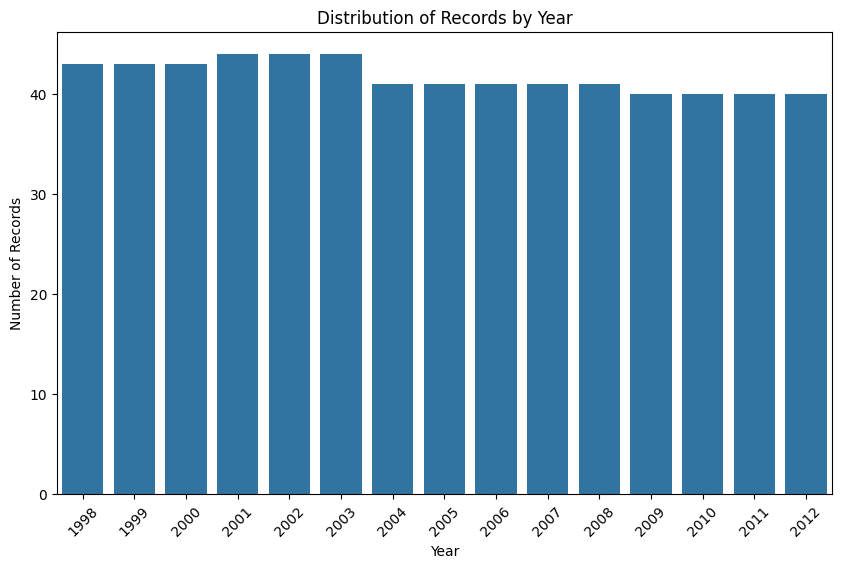

In [15]:
#6. Check the distribution of records for every year.

yearly_counts = data['year'].value_counts().sort_index()

# Plotting the distribution of records for each year
plt.figure(figsize=(10, 6))
sns.barplot(x=yearly_counts.index, y=yearly_counts.values)
plt.title('Distribution of Records by Year')
plt.xlabel('Year')
plt.ylabel('Number of Records')
plt.xticks(rotation=45)
plt.show()

In [50]:
#7. Find top 10 years with highest totalprod.

top_10_years = data[['year', 'totalprod']].groupby('year').sum().nlargest(10, 'totalprod')
print(top_10_years)

        totalprod
year             
2000  219558000.0
1998  219519000.0
1999  202387000.0
2001  185748000.0
2004  182729000.0
2003  181372000.0
2010  175294000.0
2005  173969000.0
2002  171265000.0
2008  162972000.0


In [51]:
#8. Find years with highest and lowest totalprod.

totalprod_by_year = data.groupby('year')['totalprod'].sum().reset_index()

# Find the year with the highest total production
max_totalprod_year = totalprod_by_year[totalprod_by_year['totalprod'] == totalprod_by_year['totalprod'].max()]['year'].values[0]

# Find the year with the lowest total production
min_totalprod_year = totalprod_by_year[totalprod_by_year['totalprod'] == totalprod_by_year['totalprod'].min()]['year'].values[0]

print("Year with the highest total production:", max_totalprod_year)
print("Year with the lowest total production:", min_totalprod_year)

Year with the highest total production: 2000
Year with the lowest total production: 2012


In [52]:
#9. Find top 10 states with highest totalprod.

# Sort the DataFrame by 'totalprod' in descending order and select the top 10 rows
top_10_states = data.sort_values(by='totalprod', ascending=False).head(10)

# Display the top 10 states with highest total production
print(top_10_states[['state', 'totalprod']])

    state   totalprod
532    ND  46410000.0
3      CA  37350000.0
452    ND  36000000.0
492    ND  34650000.0
114    ND  34500000.0
329    ND  33670000.0
612    ND  33120000.0
572    ND  32660000.0
220    CA  32160000.0
411    ND  31080000.0


In [53]:
#10. Show bottom 10 years with highest totalprod.

# Sort the DataFrame by 'totalprod' in descending order and select the bottom 10 rows
bottom_10_years = data.sort_values('totalprod', ascending=False).tail(10)

# Display the bottom 10 years with the highest totalprod
print(bottom_10_years[['year', 'totalprod']])

     year  totalprod
203  2002   159000.0
438  2008   156000.0
559  2011   156000.0
56   1999   150000.0
13   1998   150000.0
247  2003   141000.0
189  2002   138000.0
601  2012   136000.0
561  2011   120000.0
233  2003    84000.0


# PART 2 Data Visualization

Text(0.5, 0, 'State')

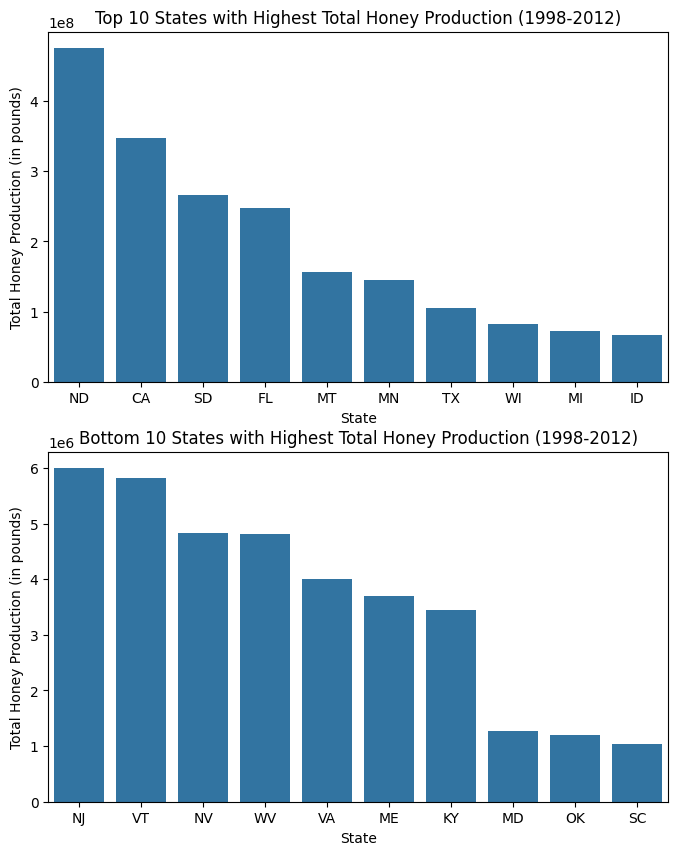

In [73]:
#1. Visualize Q 1.9 and Q1.10  

totalprod_by_state = data.groupby('state')['totalprod'].sum().sort_values(ascending=False)
top_10_states = totalprod_by_state.head(10)
bottom_10_years = totalprod_by_state.tail(10)

# Plotting the top 10 states with the highest total honey production
plt.figure(figsize=(8, 10))

plt.subplot(2,1,1)
sns.barplot(y=top_10_states.values, x=top_10_states.index);
plt.title('Top 10 States with Highest Total Honey Production (1998-2012)')
plt.ylabel('Total Honey Production (in pounds)')
plt.xlabel('State')

plt.subplot(2,1,2)
sns.barplot(y=bottom_10_years.values, x=bottom_10_years.index);
plt.title('Bottom 10 States with Highest Total Honey Production (1998-2012)')
plt.ylabel('Total Honey Production (in pounds)')
plt.xlabel('State')


In [79]:
# 2.Find states with minimum and maximum price per lb.

min_price_state = data.loc[data['priceperlb'] == data['priceperlb'].min(), 'state'].values[0]
max_price_state = data.loc[data['priceperlb'] == data['priceperlb'].max(), 'state'].values[0]

print('max price state : ', max_price_state)
print('min price state : ', min_price_state)



max price state :  HI
min price state :  LA


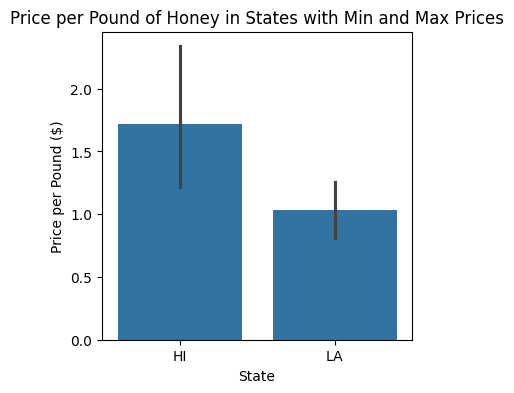

In [81]:
#3. Visualize Q 2.2  

price_data = data[['state', 'priceperlb']]
price_data = price_data.drop_duplicates()  # In case there are duplicate entries for states

# Filter the data for the states with min and max price per pound
price_data = price_data[price_data['state'].isin([min_price_state, max_price_state])]

# Plotting
plt.figure(figsize=(4, 4))
sns.barplot(x='state', y='priceperlb', data=price_data)
plt.title('Price per Pound of Honey in States with Min and Max Prices')
plt.xlabel('State')
plt.ylabel('Price per Pound ($)')
plt.show()

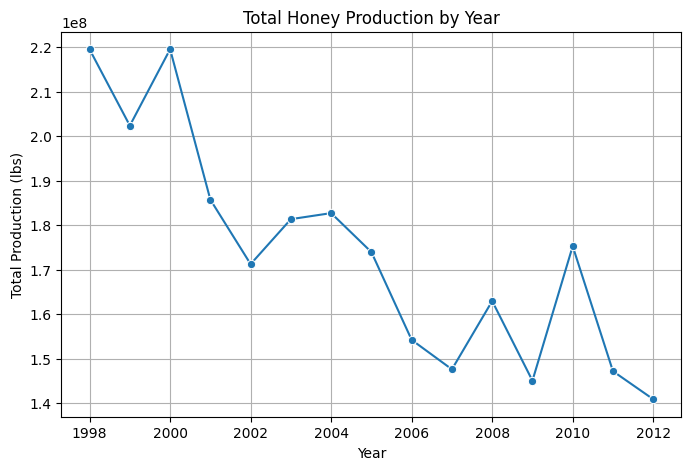

In [85]:
#4. Visualize the totalprod with respect to year.

df_yearly = data.groupby('year', as_index=False).sum()

plt.figure(figsize=(8, 5))
sns.lineplot(x='year', y='totalprod', data=df_yearly, marker='o')
plt.title('Total Honey Production by Year')
plt.xlabel('Year')
plt.ylabel('Total Production (lbs)')
plt.grid(True)
plt.show()

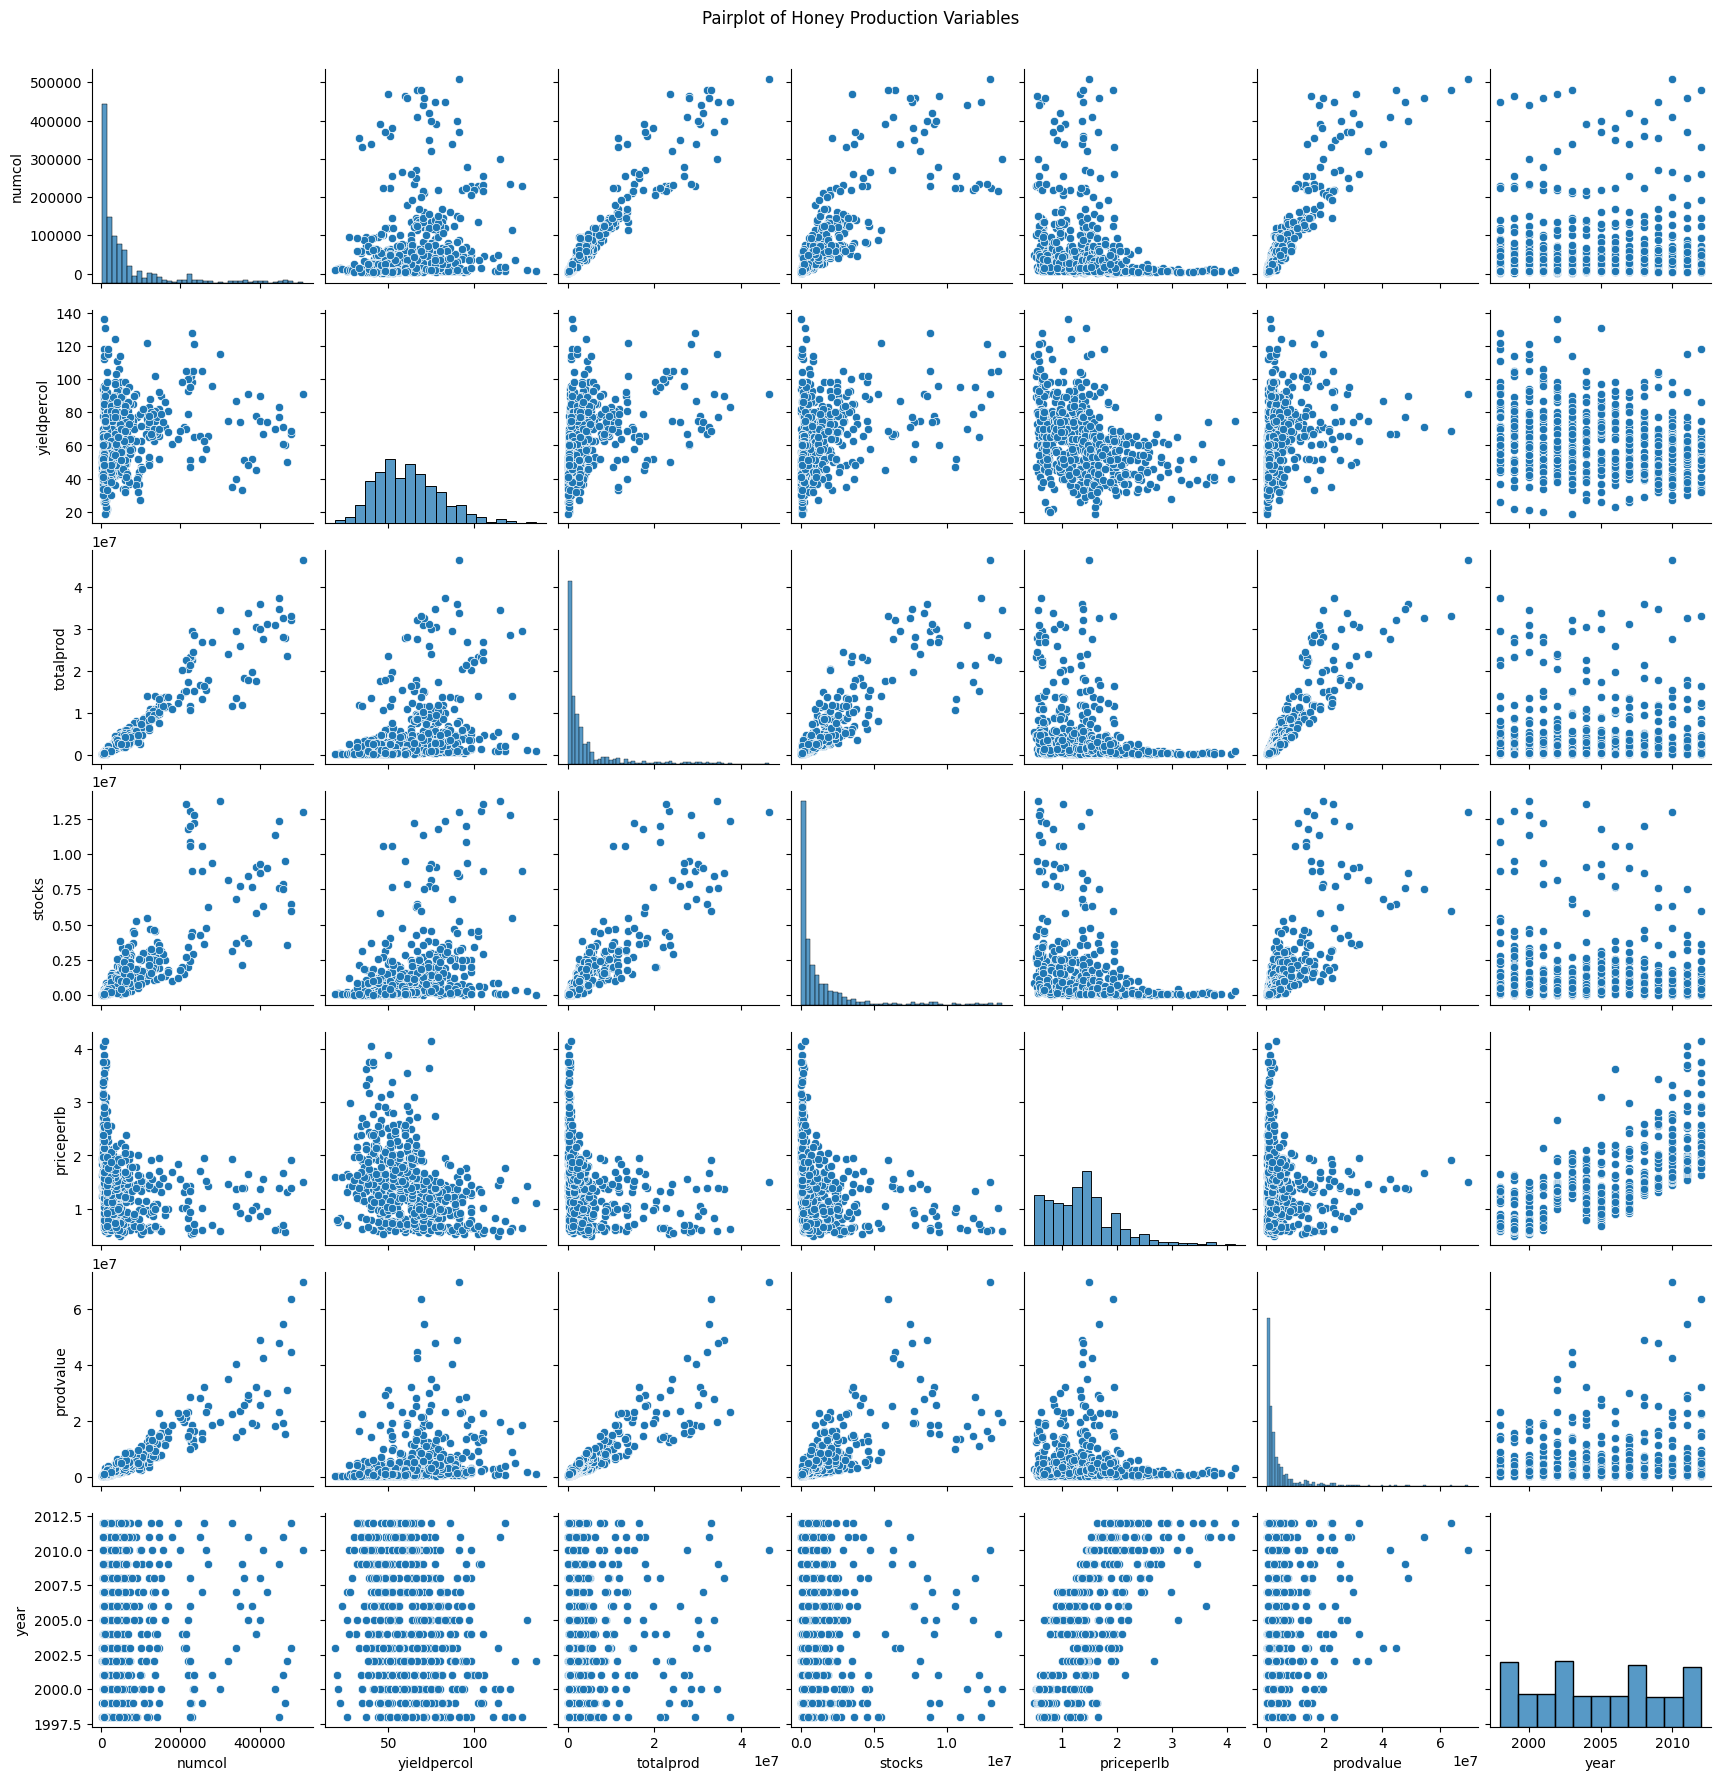

In [90]:
#5. Visualize pairplot and share your insights.

sns.pairplot(data, vars=['numcol', 'yieldpercol', 'totalprod', 'stocks', 'priceperlb', 'prodvalue','year'])
plt.suptitle("Pairplot of Honey Production Variables", y=1.02)
plt.show()

***Correlation between Variables:***
- totalprod (total honey production) is positively correlated with numcol (number of honey producing colonies) and yieldpercol (honey yield per colony) and stocks (stocks held by producers).


***Yearly Trends:***
- price per lb is positively corelated with years, i.e, Price per pound of honey is increasing year by year.

# PART 3

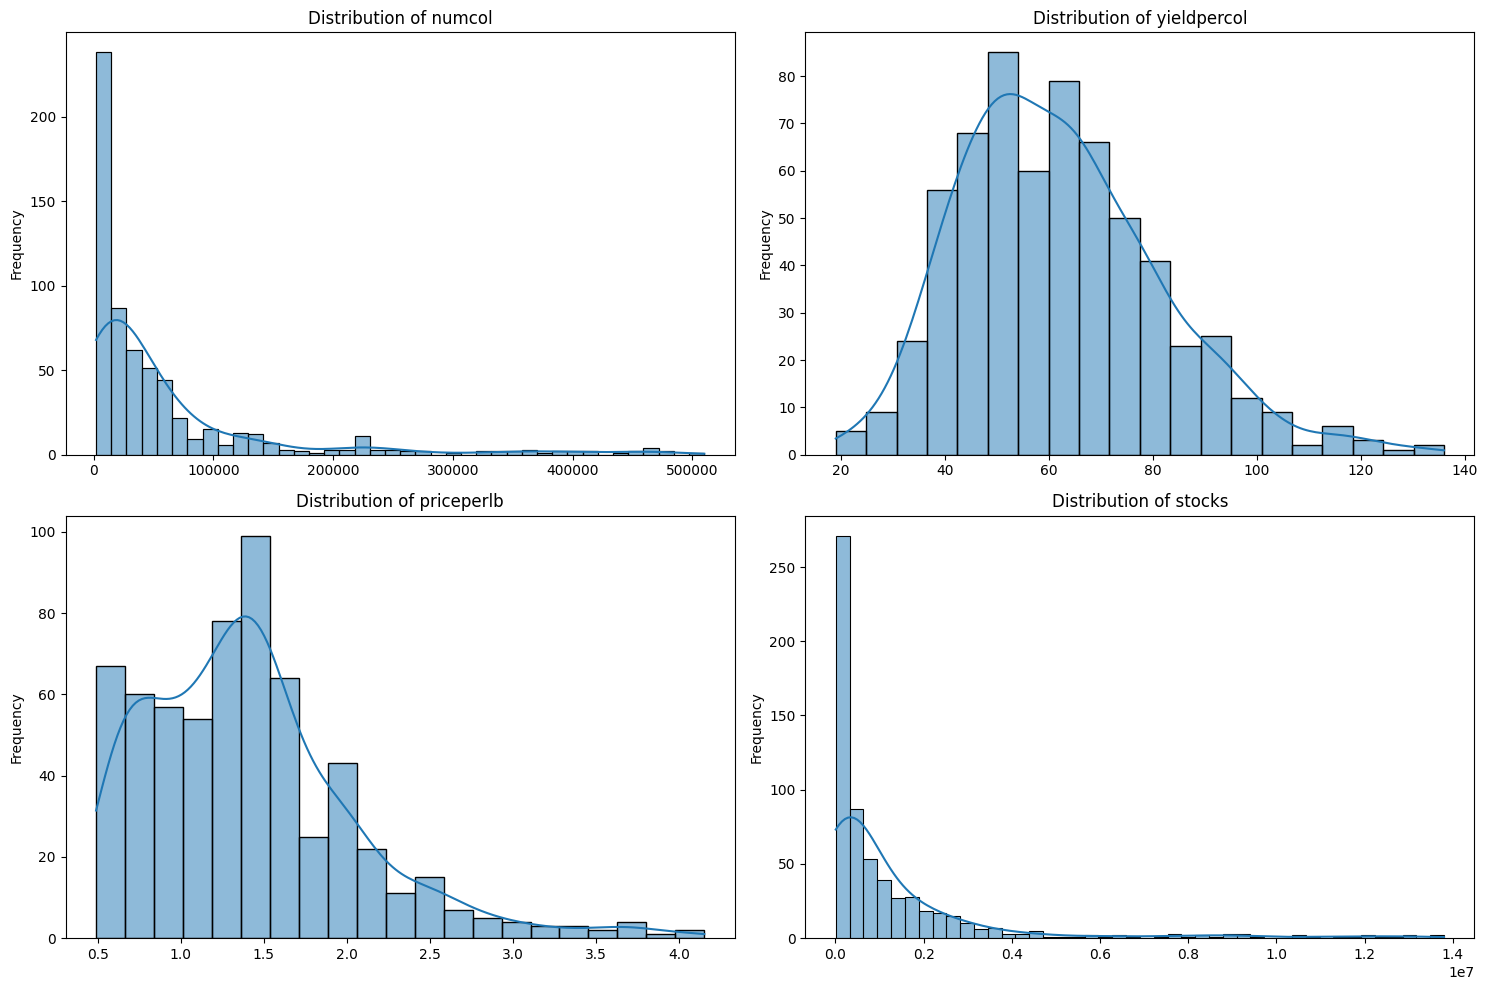

In [16]:
#1. Visualize distribution of numcol, yieldpercol, priceperlb, stocks in one single frame using subplots and share your 
# insights.
  
# Select the columns of interest
columns_of_interest = ['numcol', 'yieldpercol', 'priceperlb', 'stocks']

# Create a figure and axes for subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Flatten axes for easier iteration
axes = axes.flatten()

# Plot each variable distribution
for i, col in enumerate(columns_of_interest):
    ax = axes[i]
    sns.histplot(data[col], ax=ax, kde=True)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel('')
    ax.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

***Distribution of numcol (Number of Colonies):***
- The number of honey-producing colonies (numcol) is majorly distributed from 0 200000

***Distribution of yieldpercol (Honey Yield per Colony):***
- This histogram reveals the distribution of honey yield per colony (yieldpercol),is slightly right-skewed distribution.
- it shows most colinus produce 30 to 100 pound of honey per colonies.

***Distribution of priceperlb (Average Price per Pound):***
- This histogram reveals the distribution of Average Price per Pound is right-skewed.

***Distribution of stocks (Honey Stocks Held by Producers):***
- This histogram reveals the distribution Distribution of stocks is right-skewed.

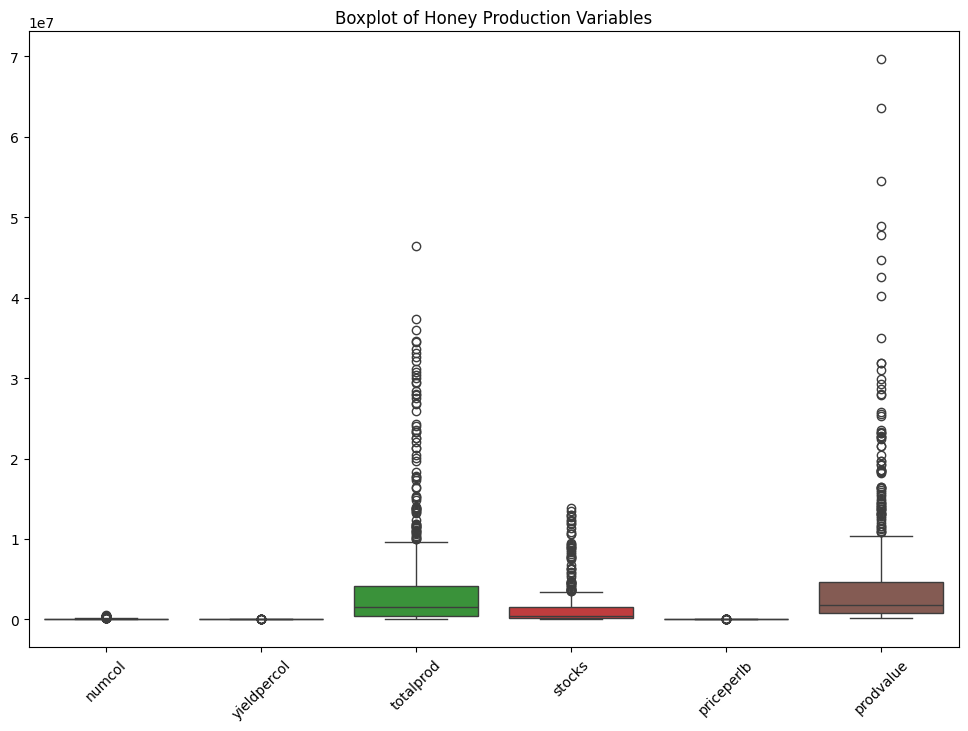

In [17]:
#2 Visualize, boxplot and confirm if there are any outliers.

columns_of_interest = ['numcol', 'yieldpercol', 'totalprod', 'stocks', 'priceperlb', 'prodvalue']

# Create a boxplot for each column
plt.figure(figsize=(12, 8))
sns.boxplot(data=data[columns_of_interest])
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('Boxplot of Honey Production Variables')
plt.show()

From the plot above it can be scene that outlighers are present for all columns.

In [19]:
#3. Find Skewness and Kurtosis of complete dataframe.

numeric_columns = data.select_dtypes(include=['float64', 'int64'])
skewness = numeric_columns.skew()
kurtosis = numeric_columns.kurtosis()

# Display skewness and kurtosis for each column
print("Skewness:")
print(skewness)
print("\nKurtosis:")
print(kurtosis)

Skewness:
numcol         2.762265
yieldpercol    0.693433
totalprod      2.901248
stocks         3.231799
priceperlb     1.194120
prodvalue      3.841915
dtype: float64

Kurtosis:
numcol          7.880120
yieldpercol     0.593365
totalprod       8.897969
stocks         11.354505
priceperlb      2.113795
prodvalue      19.316621
dtype: float64


In [21]:
#4. Make a new copy of dataset and use for further analysis.

data_copy = data.copy()

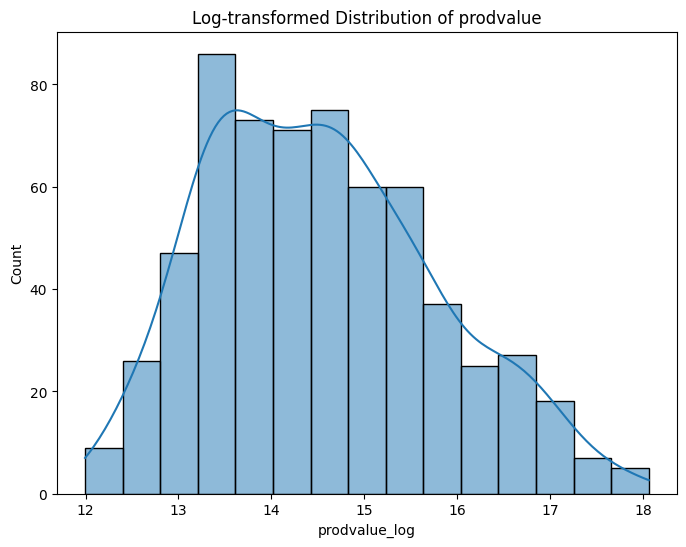

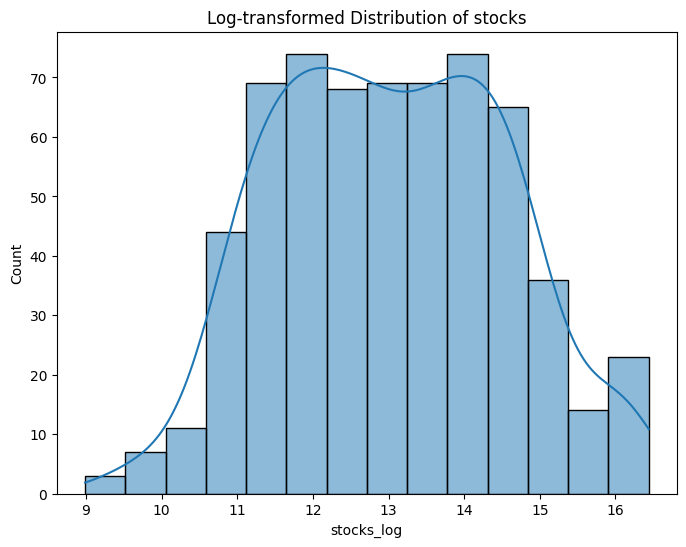

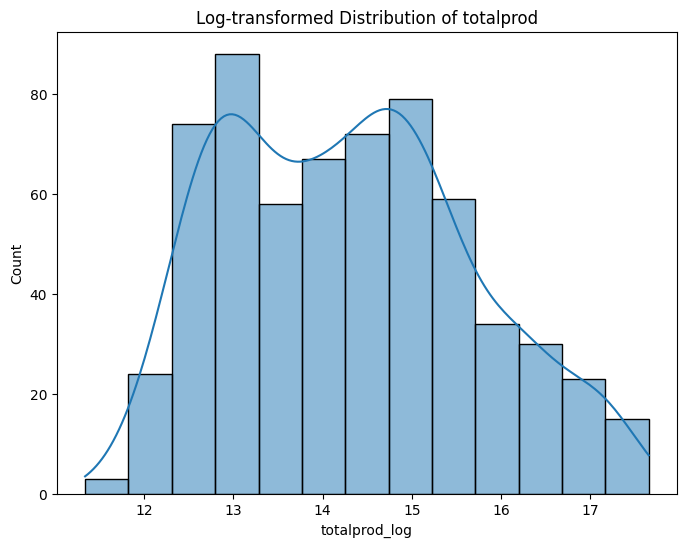

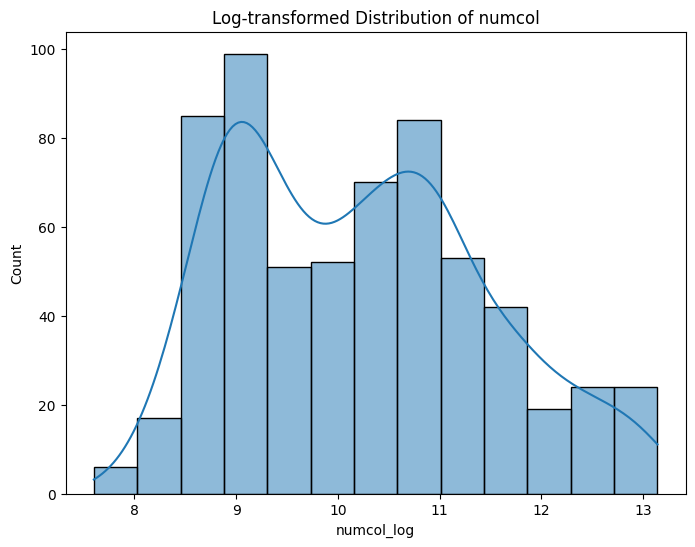

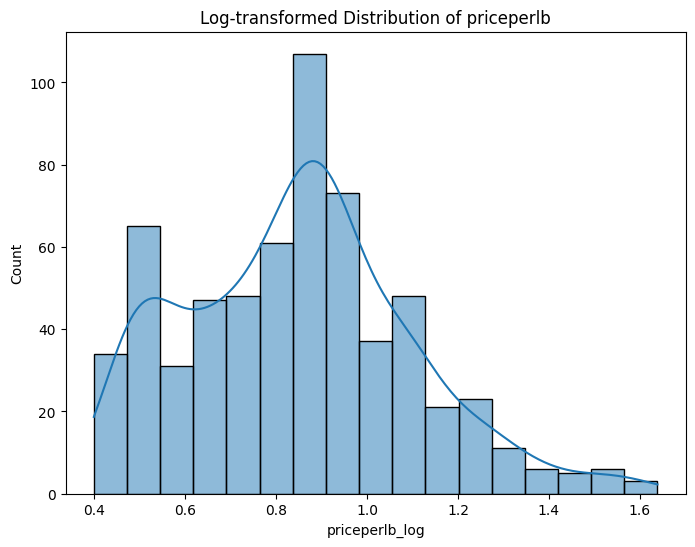

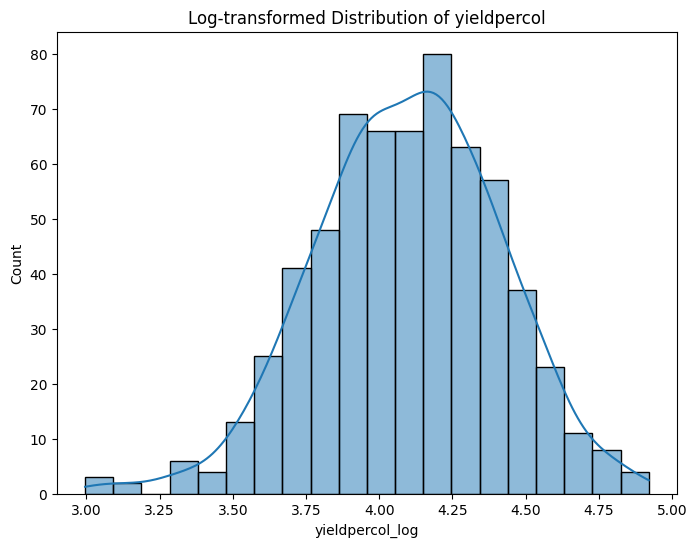

In [26]:
#5. Try to make the skewed data as normal as possible & visualize the same.

# Normalize Skewed Data
skewness = data_copy.drop(['state', 'year'], axis=1).apply(lambda x: x.skew()).sort_values(ascending=False)

# Select variables with skewness > 0.5 or <-0.5 (adjust threshold as needed)
skewed_vars = skewness[abs(skewness) > 0.5].index.tolist()

# Apply log transformation to skewed variables
for var in skewed_vars:
    data_copy[f'{var}_log'] = np.log1p(data_copy[var])

# Visualize transformed distributions
for var in skewed_vars:
    plt.figure(figsize=(8, 6))
    sns.histplot(data_copy[f'{var}_log'], kde=True)
    plt.title(f'Log-transformed Distribution of {var}')
    plt.show()


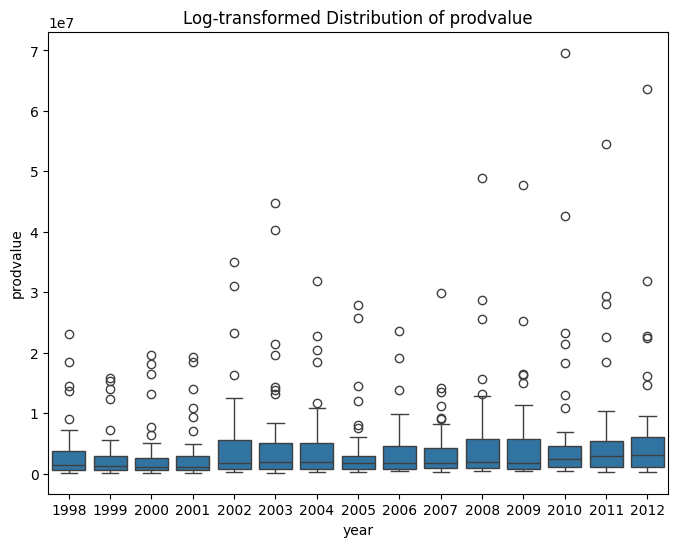

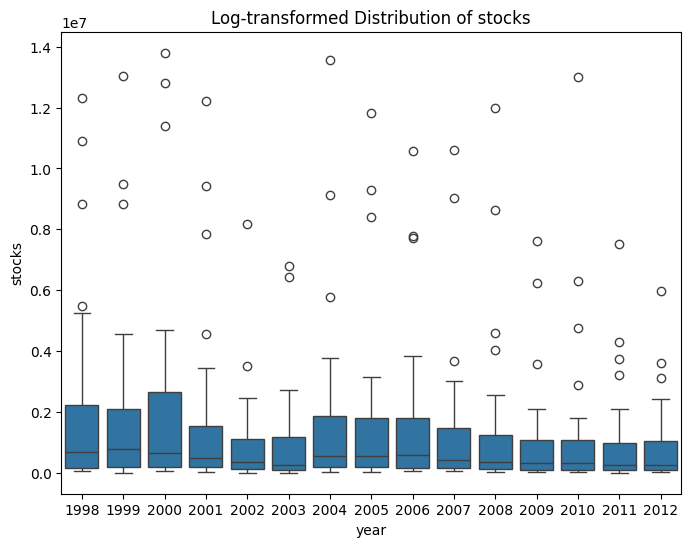

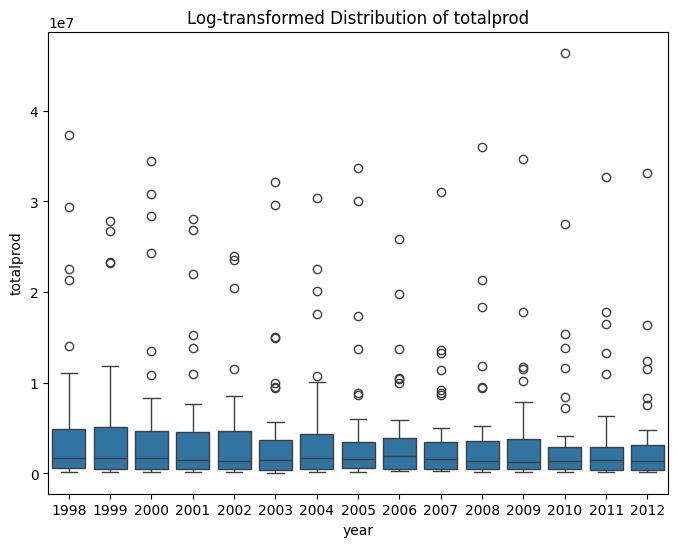

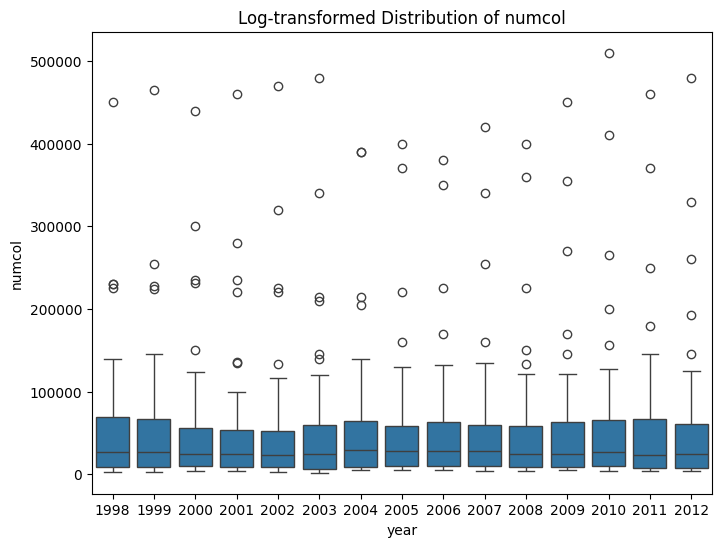

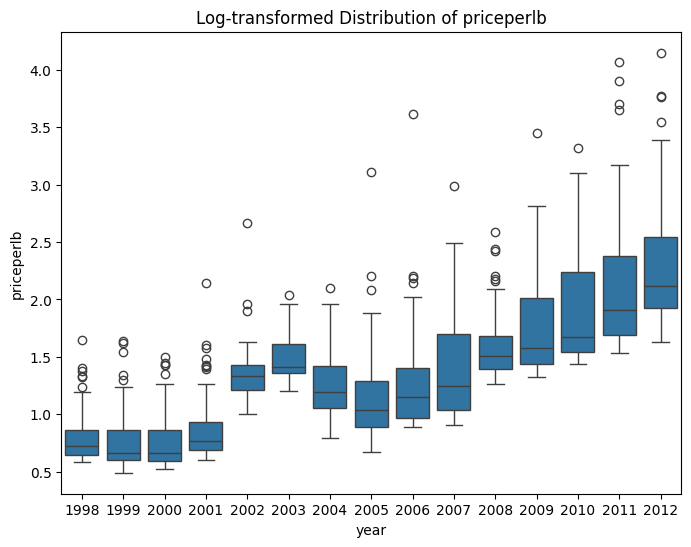

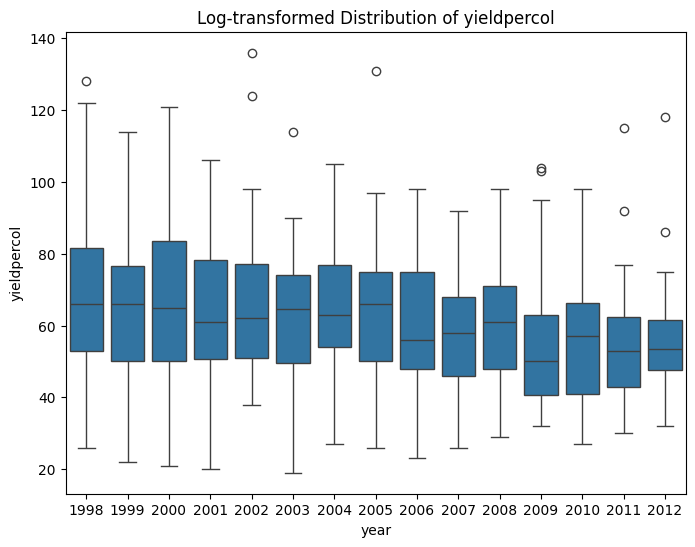

In [29]:
# Visualize Normalized Data

for var in skewed_vars:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='year', y=var, data=data_copy)
    plt.title(f'Log-transformed Distribution of {var}')
    plt.show()
